# Tutorial 1: Linear Regression
* **Author:** Robin CREMESE
* **License:** MIT License
* **Generated:** 2023-04-28

Ce tutoriel propose une courte introduction à la regression linéaire à travers un exemple pas si fictionel.

In [1]:
from scripts.linear_regression import *
from numpy.polynomial import Polynomial

## Introduction
Epidémiologiste de renom sur la côte Ouest des Etats-Unis, vous comptez bien vous changer les idées après les 6 derniers mois de travail intenses que vous venez de passer à modéliser la propagation d'un champignon tropical s'attaquant aux fourmis arboricoles le `Cordyceps`. Vous avez en effet réussi à mettre au point un modèle mathématique qui permet de prédire le nombre de personnes infectées par la maladie en fonction du temps. Vous avez également réussi à estimer les paramètres de votre modèle à partir des données de contamination des colonies de fourmis. Vous êtes donc prêt à présenter vos résultats à la communauté scientifique lors de la prochaine conférence internationale sur les maladies infectieuses. 

Pour se faire, rien de mieux que le Burning Man qui se déroule chaque année dans le désert du Nevada pour vous sortir de vos études et vous reconnecter à la nature. Vous avez donc pris la route avec votre van aménagé et vous vous apprêtez à passer une semaine de folie avec votre meilleure amie, un peu trop amatrice de stupéfiants à votre goût.

## Première semaine
Vous revenez à votre laboratoire avec l'ensemble des données récoltées tout au long du festival et vous constatez avec horreur l'augmentation préoccupante du nombre de personnes touchées par les mêmes symptômes. Vous obtenez alors le graphique suivant: 

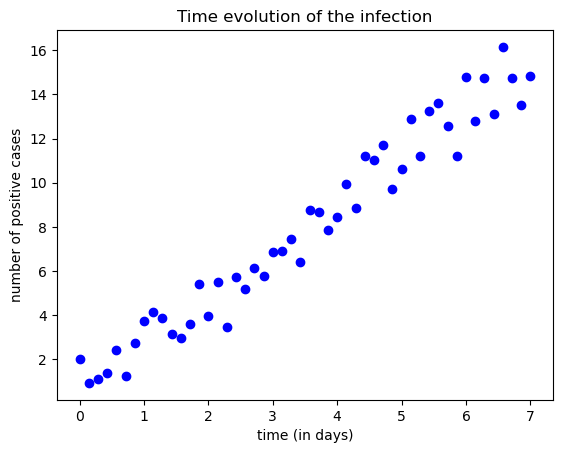

In [15]:
x_obs, y_obs = generate_propagation(f)
plot_propagation_evolutions(x_obs, y_obs)

Vous cherchez alors la manière de déterminer à quel moment la mystérieuse maladie va atteindre le seuil de 50 personnes infectées à son rythme de croissance actuel afin d'envisager au plus vite une solution pour enrayer la propagation de la maladie.

### Définition du problème
On cherche ici à déterminer les coefficient (a,b) de la droite qui interpole au mieux les données :
$f(x) = ax + b$.

On suppose que la fonction $f$ donnant le nombre d'infectés en fonction du est linéaire et que les données d'observation sont bruitées.

Pour se faire on considère que chaque observation est la somme de la fonction cible et un bruit gaussien : $y_i = f(x_i) + \epsilon_i$ avec $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$.  

On cherche donc à minimiser l'erreur quadratique moyenne entre les données et la droite interpolante :
$$(a,b) = \argmin_{(a,b)} \frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2$$

Si le nombre de cas positif est bien une fonction linéaire du temps, et que les bruits d'observations sont iid et de moyenne nulle alors à l'optimum :
$$\frac{1}{n} \sum_{i=1}^n (y_i - f(x_i))^2 = \frac{1}{n} \sum_{i=1}^n \epsilon_i^2 \simeq Var(\epsilon) = \sigma^2$$

En théorie, il est possible de déterminer les coefficients de la droite interpolante en utilisant les formules analytiques suivantes :
$$a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$
$$b = \bar{y} - a \bar{x}$$
Où $\bar{x}$ et $\bar{y}$ sont les moyennes des empirique observations $(x_i, y_i)$.



Coefficients du polynôme : 7.96507916 + 7.34617231·x


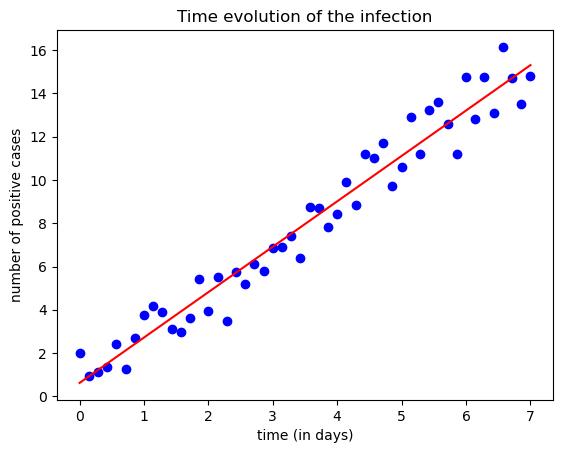

In [19]:
interp_poly = Polynomial.fit(x_obs, y_obs, 1, domain=[0, 7])
print(f"Coefficients du polynôme : {interp_poly}")
plot_propagation_evolutions(x_obs, y_obs, interp_poly)

On peut maintenant calculer l'erreur moyenne quadratique entre les données et la droite interpolante et déterminer le temps $t_s$ auquel le nombre de cas positif atteindra le seuil de 50 personnes infectées.

$50 = at_s + b \iff t_s = \frac{50 - b}{a}$

In [13]:
error = np.mean(interp_poly(x_obs) - y_obs)
ts = (100 - interp_poly.coef[0])/ interp_poly.coef[1]
print(f"Error: {error}, Seuil : {ts}")

Error: -4.387601393318619e-15, Seuil : 12.185794901373495


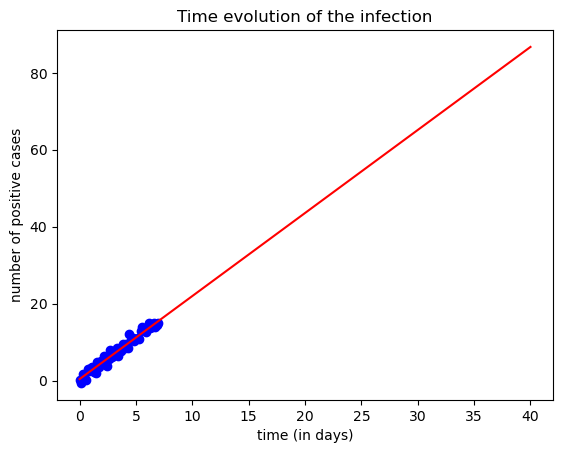

In [7]:
time = np.linspace(0, 40, 100) 
fig, ax = plt.subplots()
ax.plot(x_obs, y_obs, 'ob')
ax.plot(time, interp_poly(time), '-r')
ax.axvspan(0, )
ax.set(xlabel='time (in days)', ylabel='number of positive cases', title='Projection of the infection evolution')
fig.show()